In [21]:
# adding in dependencies
import pandas as pd
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
file = Path('myopia.csv')
df = pd.read_csv(file)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# droping myopic column
df = df.drop('MYOPIC', axis=1)


In [4]:
# myopic column has been dropped
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [5]:
# Standarize data with StandarScaler
df_scaled = StandardScaler().fit_transform(df)
print(df_scaled[0:14])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]
 [-0.42021911  1.50779097 -0.5249931  -1.54047905  0.0942193  -0.02528499
  -0.2453042   1.04507157 -0.03443904 -0.22140908  1

In [6]:
# Initialize PCA model
pca = PCA(n_components=2)

In [7]:
df_pca = pca.fit_transform(df_scaled)

In [8]:
df_pca = pd.DataFrame(
    data=df_pca, columns=["principal component 1", "principal component 2"]
)
df_pca.head()

,principal component 1,principal component 2
0,0.535503,1.145004
1,-0.624706,-1.575786
2,-0.933479,-0.717076
3,0.106354,1.192475
4,-0.388503,-2.839655


In [9]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716])

In [10]:
 # Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [11]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_pca)

c:\Users\vp510\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [12]:
tsne_features.shape

(618, 2)

In [13]:
# Prepare to plot the dataset

# The first column of transformed features
df_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_pca['y'] = tsne_features[:,1]

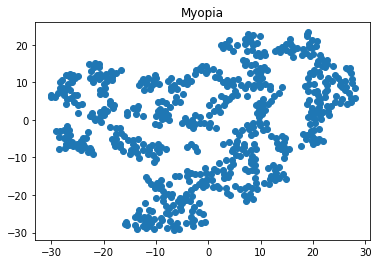

In [25]:
# Visualize the clusters
plt.scatter(df_pca['x'], df_pca['y'])
plt.title('Myopia')
plt.show()

In [22]:
# k means model

inertia = []
k = list((range(1,11)))

for i in k:
    km = KMeans(n_clusters=1, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

elbow = {'k': k, 'inertia': inertia}
df2 = pd.DataFrame(elbow)
df2.head()


c:\Users\vp510\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\vp510\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\vp510\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\vp510\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,258249.480851
1,2,258249.480851
2,3,258249.480851
3,4,258249.480851
4,5,258249.480851


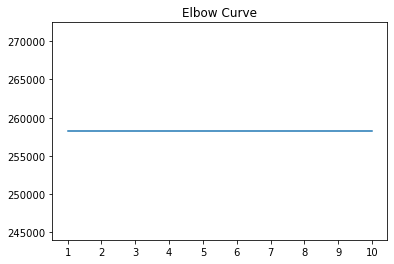

In [24]:
plt.plot(df2['k'], df2['inertia'])
plt.xticks(list(range(1,11)))
plt.title('Elbow Curve')
plt.show()

I do believe that patients can be clustered due to the scatter plot showing large clusters near each other.